In [ ]:
import numpy as np
import pandas as pd
import os

# Loading the Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_meta = pd.read_csv('/cbis-ddsm-breast-cancer-image-dataset/csv/meta.csv')
df_meta.head()

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Visibility,ImageCount
0,1.3.6.1.4.1.9590.100.1.2.117041576511324414842...,1.3.6.1.4.1.9590.100.1.2.229361142710768138411...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
1,1.3.6.1.4.1.9590.100.1.2.438738396107617880132...,1.3.6.1.4.1.9590.100.1.2.195593486612988388325...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
2,1.3.6.1.4.1.9590.100.1.2.767416741131676463382...,1.3.6.1.4.1.9590.100.1.2.257901172612530623323...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
3,1.3.6.1.4.1.9590.100.1.2.296931352612305599800...,1.3.6.1.4.1.9590.100.1.2.109468616710242115222...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
4,1.3.6.1.4.1.9590.100.1.2.436657670120353100077...,1.3.6.1.4.1.9590.100.1.2.380627129513562450304...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2


In [ ]:
# load dicom info file
df_dicom = pd.read_csv('/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv')
df_dicom.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [43]:
# check image types in dataset
df_dicom.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [44]:
# check image path in dataset
# cropped images
cropped_images = df_dicom[df_dicom.SeriesDescription=='cropped images'].image_path
#cropped_images.head(5)

In [45]:
#full mammogram images
full_mammo = df_dicom[df_dicom.SeriesDescription=='full mammogram images'].image_path

In [46]:
# ROI images
roi_img = df_dicom[df_dicom.SeriesDescription=='ROI mask images'].image_path

In [47]:
# set correct image path for image types
imdir = '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg'

In [48]:
# change directory path of images
cropped_images = cropped_images.replace('CBIS-DDSM/jpeg', imdir, regex=True)
full_mammo = full_mammo.replace('CBIS-DDSM/jpeg', imdir, regex=True)
roi_img = roi_img.replace('CBIS-DDSM/jpeg', imdir, regex=True)

# view new paths
print('Cropped Images paths:\n')
print(cropped_images.iloc[0])
print('Full mammo Images paths:\n')
print(full_mammo.iloc[0])
print('ROI Mask Images paths:\n')
print(roi_img.iloc[0])

Cropped Images paths:

../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
Full mammo Images paths:

../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg
ROI Mask Images paths:

../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


In [49]:
# organize image paths
full_mammo_dict = dict()
cropped_images_dict = dict()
roi_img_dict = dict()

for dicom in full_mammo:
    key = dicom.split("/")[4]
    full_mammo_dict[key] = dicom
for dicom in cropped_images:
    key = dicom.split("/")[4]
    cropped_images_dict[key] = dicom
for dicom in roi_img:
    key = dicom.split("/")[4]
    roi_img[key] = dicom

# view keys
next(iter((full_mammo_dict.items())))

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849',
 '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')

# Mass Dataset

In [ ]:
# load the mass dataset
mass_train = pd.read_csv('/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv')
mass_test = pd.read_csv('/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_test_set.csv')

mass_train.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [51]:
# fix image paths
def fix_image_path(data):
    """correct dicom paths to correct image paths"""
    for index, img in enumerate(data.values):
        img_name = img[11].split("/")[2]
        data.iloc[index,11] = full_mammo_dict[img_name]
        img_name = img[12].split("/")[2]
        data.iloc[index,12] = cropped_images_dict[img_name]
        
# apply to datasets
fix_image_path(mass_train)
fix_image_path(mass_test)

In [52]:
# check unique values in pathology column
mass_train.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [53]:
mass_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [54]:
# rename columns
mass_train = mass_train.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

mass_train.head(5)

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [55]:
# check for null values
mass_train.isnull().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
dtype: int64

In [56]:
# fill in missing values using the backwards fill method
mass_train['mass_shape'] = mass_train['mass_shape'].bfill()
mass_train['mass_margins'] = mass_train['mass_margins'].bfill()

#check null values
mass_train.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

In [57]:
# quantitative summary of features
mass_train.describe()

,breast_density,abnormality_id,assessment,subtlety
count,1318.000000,1318.000000,1318.000000,1318.000000
mean,2.203338,1.116085,3.504552,3.965857
std,0.873774,0.467013,1.414609,1.102032
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,3.000000,3.000000
50%,2.000000,1.000000,4.000000,4.000000
75%,3.000000,1.000000,4.000000,5.000000
max,4.000000,6.000000,5.000000,5.000000


In [58]:
# view mass_test
mass_test.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,../input/cbis-ddsm-breast-cancer-image-dataset...,../input/cbis-ddsm-breast-cancer-image-dataset...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....


In [59]:
# check datasets shape
print(f'Shape of mass_train: {mass_train.shape}')
print(f'Shape of mass_test: {mass_test.shape}')

Shape of mass_train: (1318, 14)
Shape of mass_test: (378, 14)


In [60]:
mass_test.isnull().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  0
mass margins               17
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [61]:
mass_test = mass_test.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

In [62]:
# fill in missing values using the backwards fill method
mass_test['mass_margins'] = mass_test['mass_margins'].bfill()

#check null values
mass_test.isnull().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality_id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image_file_path            0
cropped_image_file_path    0
ROI_mask_file_path         0
dtype: int64

# Visualizations

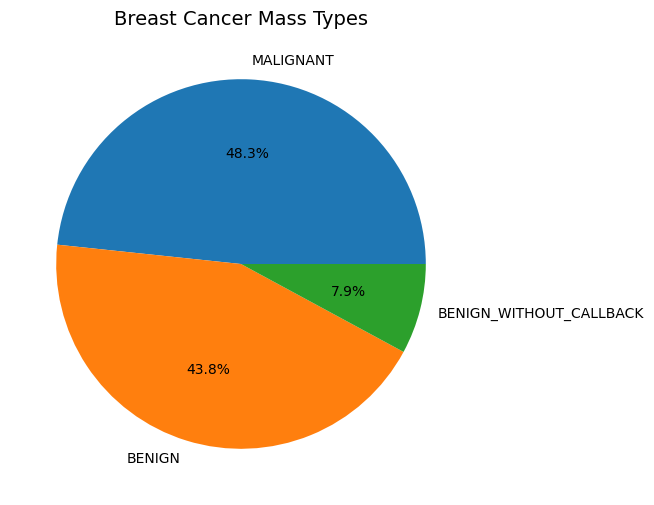

In [63]:
# pathology distributions
value = mass_train['pathology'].value_counts()
plt.figure(figsize=(8,6))

plt.pie(value, labels=value.index, autopct='%1.1f%%')
plt.title('Breast Cancer Mass Types', fontsize=14)
plt.savefig('/kaggle/working/pathology_distributions_red.png')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

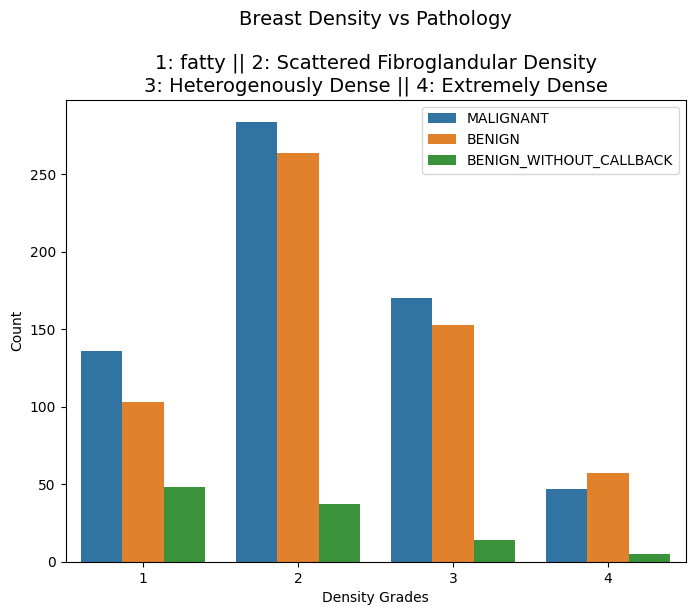

In [64]:
# breast density against pathology
plt.figure(figsize=(8,6))

sns.countplot(mass_train, x='breast_density', hue='pathology')
plt.title('Breast Density vs Pathology\n\n1: fatty || 2: Scattered Fibroglandular Density\n3: Heterogenously Dense || 4: Extremely Dense',
          fontsize=14)
plt.xlabel('Density Grades')
plt.ylabel('Count')
plt.legend()
plt.savefig('/kaggle/working/density_pathology_red.png')
plt.show()

Full Mammograms:



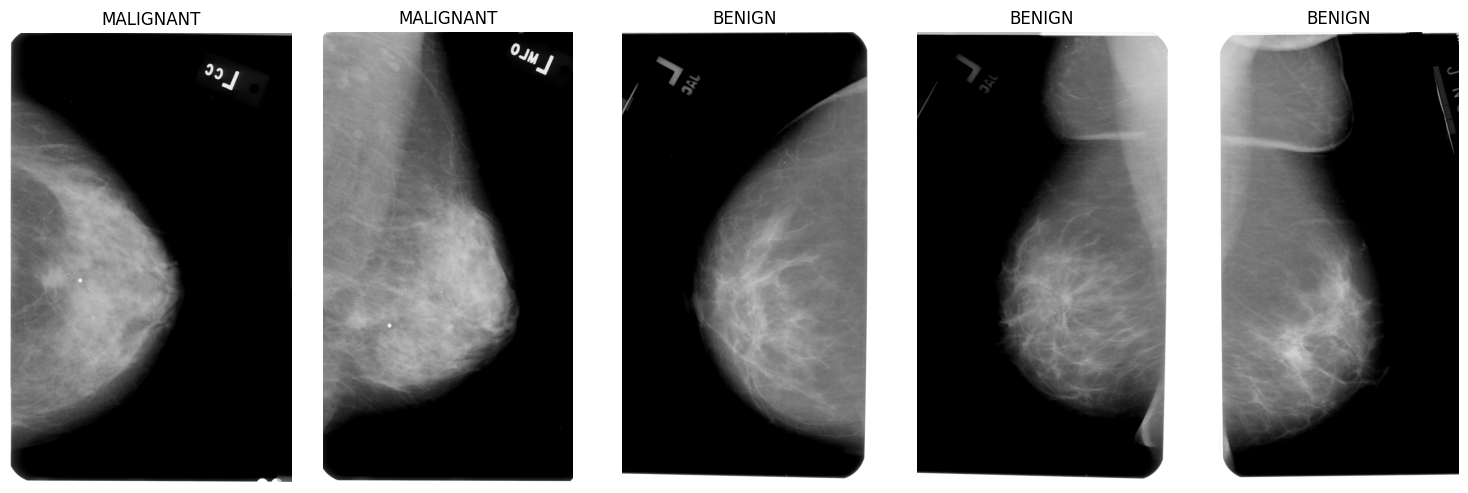

Cropped Mammograms:



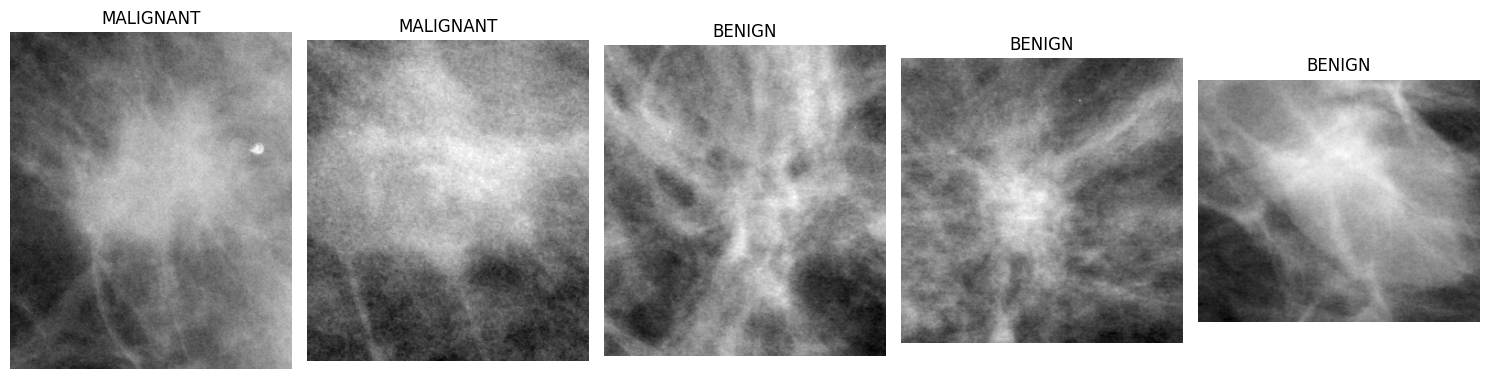

In [65]:
# Display some images
import matplotlib.image as mpimg

# create function to display images
def display_images(column, number):
    # create figure and axes
    number_to_visualize = number
    rows = 1
    cols = number_to_visualize
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))
    
    # Loop through rows and display images
    for index, row in mass_train.head(number_to_visualize).iterrows():
        image_path = row[column]
        image = mpimg.imread(image_path)
        ax = axes[index]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"{row['pathology']}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

print('Full Mammograms:\n')
display_images('image_file_path', 5)
print('Cropped Mammograms:\n')
display_images('cropped_image_file_path', 5)

# Preprocessing of Images

In [66]:
!pip install tensorflow_addons

In [67]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

auc = tf.keras.metrics.AUC()
f1_score = tfa.metrics.F1Score(num_classes=2)
kappa = tfa.metrics.CohenKappa(num_classes=2)


def image_processor(image_path, target_size):
    """Preprocess images for CNN model"""
    absolute_image_path = os.path.abspath(image_path)
    image = cv2.imread(absolute_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (target_size[1], target_size[0]))
    image_array = image / 255.0
    return image_array


full_mass = pd.concat([mass_train, mass_test], axis=0)

target_size = (224, 224, 3)


full_mass['processed_images'] = full_mass['image_file_path'].apply(lambda x: image_processor(x, target_size))


class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0} 


X_resized = np.array(full_mass['processed_images'].tolist())


full_mass['labels'] = full_mass['pathology'].replace(class_mapper)


num_classes = len(full_mass['labels'].unique())



In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_resized, full_mass['labels'].values, test_size = 0.2, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
y_val = to_categorical(y_val, 2)


print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))
print('X_val shape: {}' .format(X_val.shape))
print('y_val shape: {}' .format(y_val.shape))

X_train shape : (1356, 224, 224, 3)
X_test shape : (170, 224, 224, 3)
y_train shape : (1356, 2)
y_test shape : (170, 2)
X_val shape: (170, 224, 224, 3)
y_val shape: (170, 2)


# InceptionResNet Architecture

In [69]:
# Import necessary TensorFlow libraries

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU
from keras.optimizers import Adam, SGD, RMSprop, Nadam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from keras.applications import InceptionV3
from keras.utils import plot_model

# Augment data
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    channel_shift_range=20)

# apply augmentation to training data
image_size=224
train_data_augmented = train_datagen.flow(X_train, y_train, batch_size=32)

mode = InceptionV3(input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet')


for layer in mode.layers[:-5]:
    layer.trainable = False

# instantiate CNN model
model = tf.keras.Sequential([mode,
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(2, activation='softmax')
])




# compile model
model.compile(loss='categorical_crossentropy', 
              optimizer=Nadam(learning_rate=0.0001), 
              metrics=['accuracy', auc, f1_score, kappa])

# train model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10 , batch_size = 75)

Epoch 1/10
19/19 [==============================] - 10s 264ms/step - loss: 3.9826 - accuracy: 0.5406 - auc_3: 0.5420 - f1_score: 0.5217 - cohen_kappa: -0.9243 - val_loss: 3.1154 - val_accuracy: 0.5412 - val_auc_3: 0.5567 - val_f1_score: 0.4339 - val_cohen_kappa: -0.6814
Epoch 2/10
19/19 [==============================] - 2s 109ms/step - loss: 2.9497 - accuracy: 0.6586 - auc_3: 0.7145 - f1_score: 0.6432 - cohen_kappa: -0.9177 - val_loss: 2.9708 - val_accuracy: 0.5529 - val_auc_3: 0.6019 - val_f1_score: 0.4940 - val_cohen_kappa: -0.7915
Epoch 3/10
19/19 [==============================] - 2s 110ms/step - loss: 2.6896 - accuracy: 0.7294 - auc_3: 0.8048 - f1_score: 0.7228 - cohen_kappa: -0.9536 - val_loss: 2.7427 - val_accuracy: 0.6294 - val_auc_3: 0.6645 - val_f1_score: 0.6183 - val_cohen_kappa: -0.9434
Epoch 4/10
19/19 [==============================] - 2s 109ms/step - loss: 2.4640 - accuracy: 0.7692 - auc_3: 0.8599 - f1_score: 0.7660 - cohen_kappa: -0.9735 - val_loss: 2.6786 - val_accura

# Evaluation

In [70]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 2s 196ms/step - loss: 2.1569 - accuracy: 0.5941 - auc_3: 0.6462 - f1_score: 0.5865 - cohen_kappa: -0.9640


[2.1568775177001953,
 0.5941176414489746,
 0.6462456583976746,
 array([0.64248705, 0.5306123 ], dtype=float32),
 -0.9640491008758545]

# Classification Report

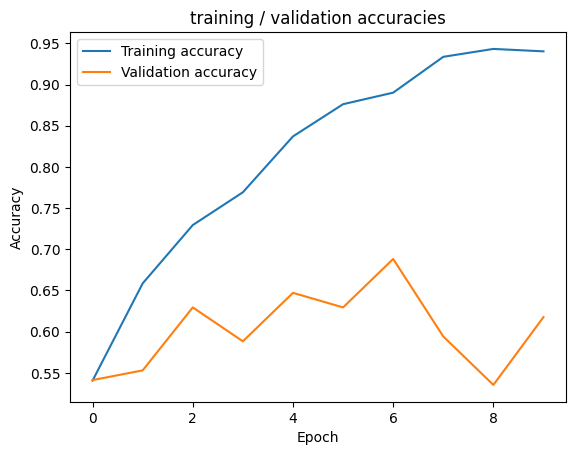

In [71]:
import matplotlib.pyplot as plt

# Visualize model history
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

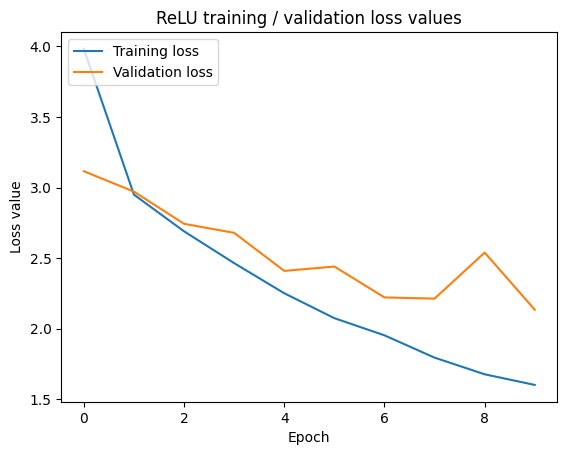

In [72]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# ResNet50 Architecture

In [73]:
from tensorflow.keras.applications.resnet50 import ResNet50

mode = ResNet50(input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet')


for layer in mode.layers[:-5]:
    layer.trainable = False

model = tf.keras.Sequential([mode,
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(2, activation='softmax')
])





model.compile(loss='categorical_crossentropy', 
              optimizer=Nadam(learning_rate=0.0001), 
              metrics=['accuracy', auc, f1_score, kappa])

# train model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10 , batch_size = 75)

94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/10
19/19 [==============================] - 12s 292ms/step - loss: 3.1854 - accuracy: 0.5516 - auc_3: 0.5530 - f1_score: 0.5428 - cohen_kappa: -0.9423 - val_loss: 2.3790 - val_accuracy: 0.5176 - val_auc_3: 0.5357 - val_f1_score: 0.3411 - val_cohen_kappa: -0.5773
Epoch 2/10
19/19 [==============================] - 3s 149ms/step - loss: 1.8481 - accuracy: 0.5796 - auc_3: 0.5997 - f1_score: 0.5615 - cohen_kappa: -0.9204 - val_loss: 1.9123 - val_accuracy: 0.5176 - val_auc_3: 0.5608 - val_f1_score: 0.3411 - val_cohen_kappa: -0.5773
Epoch 3/10
19/19 [==============================] - 3s 147ms/step - loss: 1.3222 - accuracy: 0.5715 - auc_3: 0.6172 - f1_score: 0.5481 - cohen_kappa: -0.9013 - val_loss: 1.1307 - val_accuracy: 0.5353 - val_auc_3: 0.5789 - val_f1_score: 0.3804 - val_cohen_kappa: -0.6000
Epoch 4/10
19/19 [==============================] - 3s 148ms/step - loss: 1.0259 - accuracy: 0.5914 - auc_3: 0.6444 - f1_sco

In [74]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 1s 127ms/step - loss: 0.8594 - accuracy: 0.5235 - auc_3: 0.5857 - f1_score: 0.4804 - cohen_kappa: -0.8466


[0.8593810200691223,
 0.5235294103622437,
 0.5856920480728149,
 array([0.63013697, 0.3305785 ], dtype=float32),
 -0.8465863466262817]

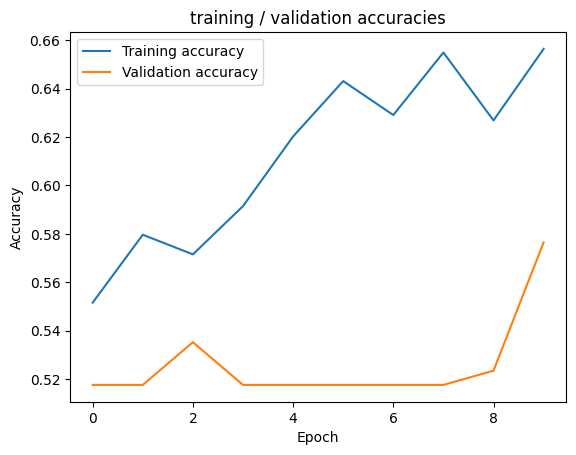

In [75]:
# Visualize model history
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

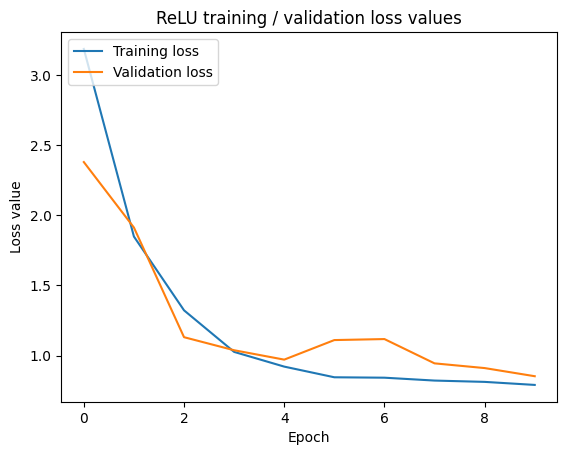

In [76]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# VGG16

In [77]:
from tensorflow.keras.applications import VGG16
mode = VGG16(input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet')


for layer in mode.layers[:-5]:
    layer.trainable = False

model = tf.keras.Sequential([mode,
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(2, activation='softmax')
])





model.compile(loss='categorical_crossentropy', 
              optimizer=Nadam(learning_rate=0.0001), 
              metrics=['accuracy', auc, f1_score, kappa])

# train model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10 , batch_size = 75)


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
19/19 [==============================] - 15s 359ms/step - loss: 3.1455 - accuracy: 0.5590 - auc_3: 0.5948 - f1_score: 0.5406 - cohen_kappa: -0.9389 - val_loss: 2.9607 - val_accuracy: 0.5176 - val_auc_3: 0.6149 - val_f1_score: 0.3411 - val_cohen_kappa: -0.5773
Epoch 2/10
19/19 [==============================] - 4s 192ms/step - loss: 7.8895 - accuracy: 0.7006 - auc_3: 0.7643 - f1_score: 0.6907 - cohen_kappa: -0.9383 - val_loss: 2.6487 - val_accuracy: 0.6824 - val_auc_3: 0.7228 - val_f1_score: 0.6779 - val_cohen_kappa: -0.9727
Epoch 3/10
19/19 [==============================] - 4s 192ms/step - loss: 2.4642 - accuracy: 0.7839 - auc_3: 0.8675 - f1_score: 0.7810 - cohen_kappa: -0.9735 - val_loss: 2.7719 - val_accuracy: 0.6000 - val_auc_3: 0.6272 - val_f1_score: 0.5290 - val_cohen_kappa: -0.7380
Epoch 4/10
19/19 [==============================] - 4s 193ms/step - loss: 8.1260 - accuracy: 0.8562 - auc_3: 0.9264 - f1_sco

In [78]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 3s 224ms/step - loss: 248.3942 - accuracy: 0.5706 - auc_3: 0.6337 - f1_score: 0.5317 - cohen_kappa: -0.8466


[248.3942108154297,
 0.570588231086731,
 0.6337369680404663,
 array([0.6666666 , 0.39669418], dtype=float32),
 -0.8465863466262817]

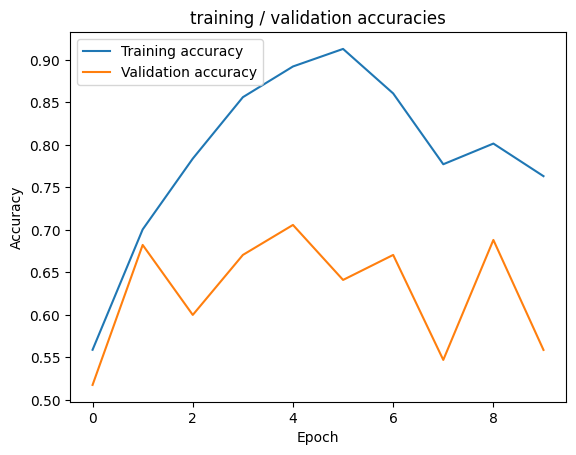

In [79]:
# Visualize model history
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

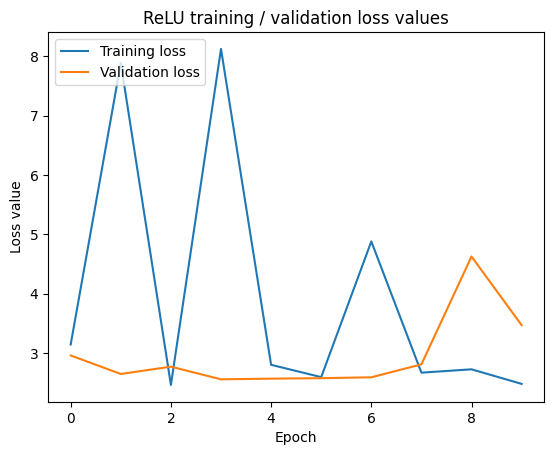

In [80]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# VGG19

In [81]:
from tensorflow.keras.applications import VGG19
mode = VGG19(input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet')


for layer in mode.layers[:-5]:
    layer.trainable = False

model = tf.keras.Sequential([mode,
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(2, activation='softmax')
])





model.compile(loss='categorical_crossentropy', 
              optimizer=Nadam(learning_rate=0.0001), 
              metrics=['accuracy', auc, f1_score, kappa])

# train model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10 , batch_size = 75)


80134624/80134624 [==============================] - 1s 0us/step
Epoch 1/10
19/19 [==============================] - 9s 283ms/step - loss: 4.0527 - accuracy: 0.5973 - auc_3: 0.6216 - f1_score: 0.5751 - cohen_kappa: -0.9132 - val_loss: 2.8231 - val_accuracy: 0.5118 - val_auc_3: 0.5915 - val_f1_score: 0.4014 - val_cohen_kappa: -0.6886
Epoch 2/10
19/19 [==============================] - 4s 234ms/step - loss: 32.5015 - accuracy: 0.6578 - auc_3: 0.7027 - f1_score: 0.6547 - cohen_kappa: -0.9823 - val_loss: 2.4832 - val_accuracy: 0.6059 - val_auc_3: 0.6386 - val_f1_score: 0.5840 - val_cohen_kappa: -0.9000
Epoch 3/10
19/19 [==============================] - 4s 234ms/step - loss: 5.0358 - accuracy: 0.6711 - auc_3: 0.7248 - f1_score: 0.6558 - cohen_kappa: -0.9148 - val_loss: 2.3220 - val_accuracy: 0.6176 - val_auc_3: 0.6893 - val_f1_score: 0.6007 - val_cohen_kappa: -0.9187
Epoch 4/10
19/19 [==============================] - 4s 234ms/step - loss: 9.3509 - accuracy: 0.6807 - auc_3: 0.7508 - f1_sco

In [82]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 73ms/step - loss: 37.9483 - accuracy: 0.4765 - auc_3: 0.5179 - f1_score: 0.4370 - cohen_kappa: -0.8690


[37.94826126098633,
 0.47647058963775635,
 0.5178892612457275,
 array([0.5860465 , 0.28800002], dtype=float32),
 -0.8690379858016968]

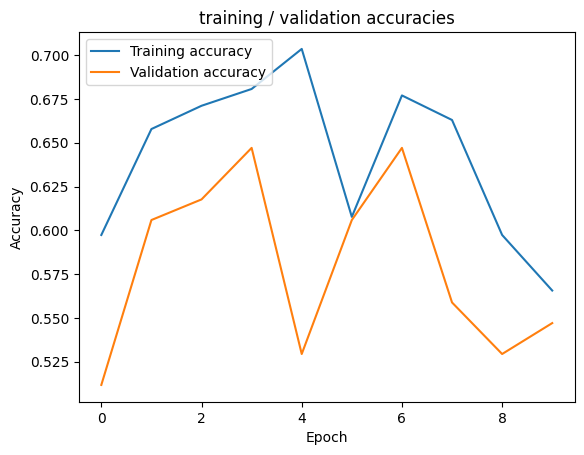

In [83]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

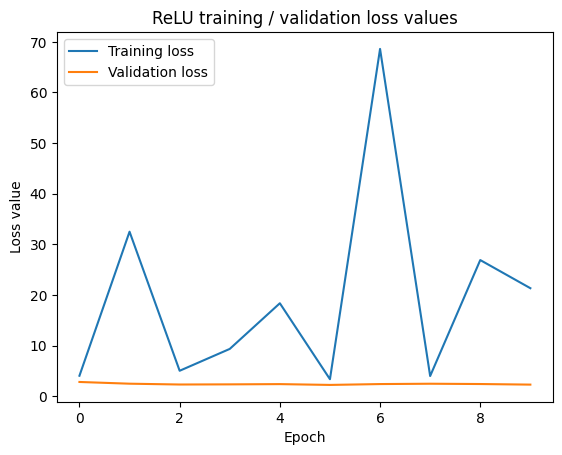

In [84]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# MobilenetV2

In [85]:
from tensorflow.keras.applications import MobileNetV2
mode = MobileNetV2(input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet')


for layer in mode.layers[:-5]:
    layer.trainable = False

model = tf.keras.Sequential([mode,
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(2, activation='softmax')
])





model.compile(loss='categorical_crossentropy', 
              optimizer=Nadam(learning_rate=0.0001), 
              metrics=['accuracy', auc, f1_score, kappa])

# train model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10 , batch_size = 75)


9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
19/19 [==============================] - 11s 211ms/step - loss: 3.3596 - accuracy: 0.5900 - auc_3: 0.6126 - f1_score: 0.5714 - cohen_kappa: -0.9729 - val_loss: 3.0600 - val_accuracy: 0.6176 - val_auc_3: 0.6437 - val_f1_score: 0.6166 - val_cohen_kappa: -0.9944
Epoch 2/10
19/19 [==============================] - 2s 85ms/step - loss: 2.6505 - accuracy: 0.8827 - auc_3: 0.9515 - f1_score: 0.8815 - cohen_kappa: -0.9786 - val_loss: 2.9646 - val_accuracy: 0.6353 - val_auc_3: 0.6581 - val_f1_score: 0.6279 - val_cohen_kappa: -0.9609
Epoch 3/10
19/19 [==============================] - 2s 84ms/step - loss: 2.2948 - accuracy: 0.9594 - auc_3: 0.9921 - f1_score: 0.9589 - cohen_kappa: -0.9761 - val_loss: 3.0008 - val_accuracy: 0.5941 - val_auc_3: 0.6317 - val_f1_score: 0.5385 - val_cohen_kappa: -0.7850
Epoch 4/10
19/19 [==============================] - 2s 84ms/step - loss: 2.0434 - accuracy: 0.9956 - auc_3: 0.9983 - f1_score: 0

In [86]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 1s 92ms/step - loss: 2.2869 - accuracy: 0.6176 - auc_3: 0.6479 - f1_score: 0.6176 - cohen_kappa: -0.9999


[2.286935329437256,
 0.6176470518112183,
 0.6479065418243408,
 array([0.61988306, 0.61538464], dtype=float32),
 -0.9999308586120605]

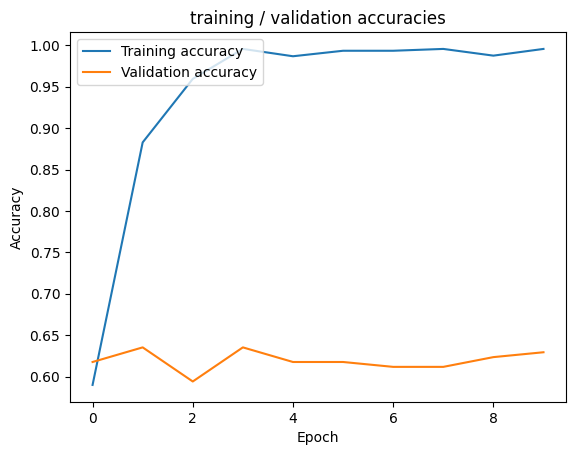

In [87]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

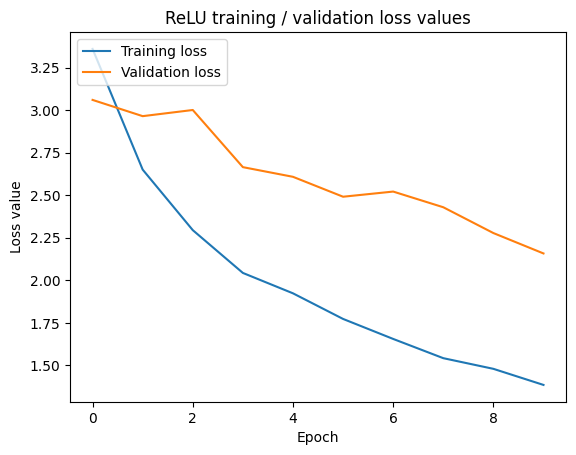

In [88]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Convolution 2Layer Deep

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM

model = Sequential([
    Conv2D(64, kernel_size=(3,3), input_shape=(224, 224, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy', auc, f1_score, kappa])

In [90]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10 , batch_size = 75)

Epoch 1/10
19/19 [==============================] - 9s 208ms/step - loss: 2.2425 - accuracy: 0.5162 - auc_3: 0.5235 - f1_score: 0.4936 - cohen_kappa: -0.8744 - val_loss: 17.1585 - val_accuracy: 0.4706 - val_auc_3: 0.4710 - val_f1_score: 0.4699 - val_cohen_kappa: -0.9975
Epoch 2/10
19/19 [==============================] - 3s 133ms/step - loss: 4.0797 - accuracy: 0.5627 - auc_3: 0.5681 - f1_score: 0.5297 - cohen_kappa: -0.8690 - val_loss: 96.5023 - val_accuracy: 0.5059 - val_auc_3: 0.5310 - val_f1_score: 0.5056 - val_cohen_kappa: -0.9989
Epoch 3/10
19/19 [==============================] - 2s 131ms/step - loss: 0.9091 - accuracy: 0.5487 - auc_3: 0.5679 - f1_score: 0.5028 - cohen_kappa: -0.8310 - val_loss: 36.4734 - val_accuracy: 0.5824 - val_auc_3: 0.5600 - val_f1_score: 0.5509 - val_cohen_kappa: -0.8690
Epoch 4/10
19/19 [==============================] - 2s 130ms/step - loss: 2.0277 - accuracy: 0.5664 - auc_3: 0.5902 - f1_score: 0.5405 - cohen_kappa: -0.8932 - val_loss: 15.8504 - val_acc

In [91]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 1s 58ms/step - loss: 9.2339 - accuracy: 0.5941 - auc_3: 0.5925 - f1_score: 0.5938 - cohen_kappa: -0.9983


[9.233898162841797,
 0.5941176414489746,
 0.5924739837646484,
 array([0.5818182, 0.6057142], dtype=float32),
 -0.9982715845108032]

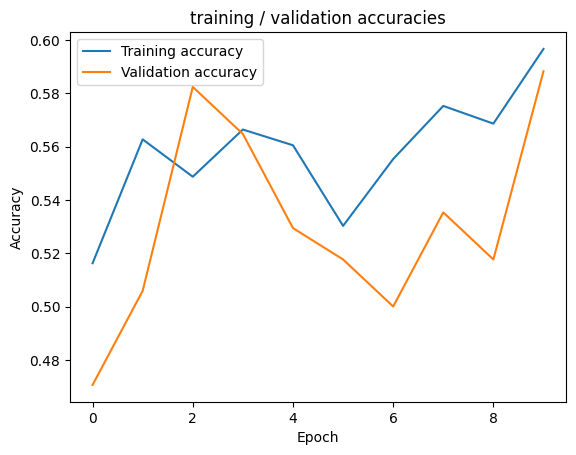

In [92]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

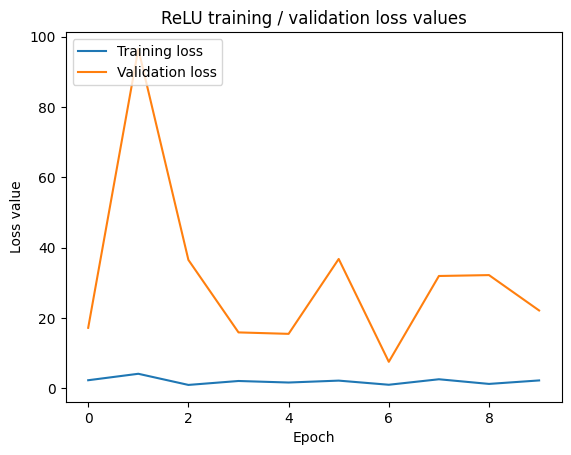

In [93]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Conv 3 Layer Deep

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM

model = Sequential([
    Conv2D(64, kernel_size=(3,3), input_shape=(224, 224, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy', auc, f1_score, kappa])

In [95]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10 , batch_size = 75)

Epoch 1/10
19/19 [==============================] - 7s 192ms/step - loss: 1.1245 - accuracy: 0.5383 - auc_3: 0.5396 - f1_score: 0.4642 - cohen_kappa: -0.7391 - val_loss: 7.3659 - val_accuracy: 0.5294 - val_auc_3: 0.5710 - val_f1_score: 0.4119 - val_cohen_kappa: -0.6669
Epoch 2/10
19/19 [==============================] - 3s 138ms/step - loss: 0.7003 - accuracy: 0.5302 - auc_3: 0.5522 - f1_score: 0.4969 - cohen_kappa: -0.8757 - val_loss: 0.6885 - val_accuracy: 0.5176 - val_auc_3: 0.5528 - val_f1_score: 0.3411 - val_cohen_kappa: -0.5773
Epoch 3/10
19/19 [==============================] - 3s 138ms/step - loss: 0.6945 - accuracy: 0.5516 - auc_3: 0.5691 - f1_score: 0.4397 - cohen_kappa: -0.6671 - val_loss: 0.6945 - val_accuracy: 0.5294 - val_auc_3: 0.5434 - val_f1_score: 0.4988 - val_cohen_kappa: -0.8849
Epoch 4/10
19/19 [==============================] - 3s 139ms/step - loss: 0.7463 - accuracy: 0.5509 - auc_3: 0.5596 - f1_score: 0.5304 - cohen_kappa: -0.9165 - val_loss: 0.7883 - val_accurac

In [96]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 34ms/step - loss: 0.8032 - accuracy: 0.5118 - auc_3: 0.5351 - f1_score: 0.5010 - cohen_kappa: -0.9577


[0.8032228350639343,
 0.5117647051811218,
 0.5351037383079529,
 array([0.574359 , 0.4275862], dtype=float32),
 -0.9576631784439087]

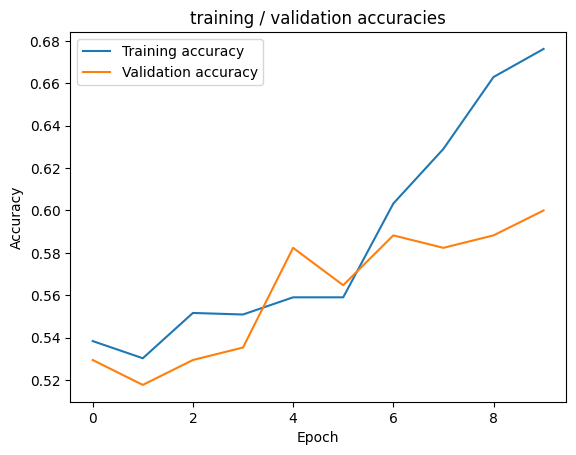

In [97]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

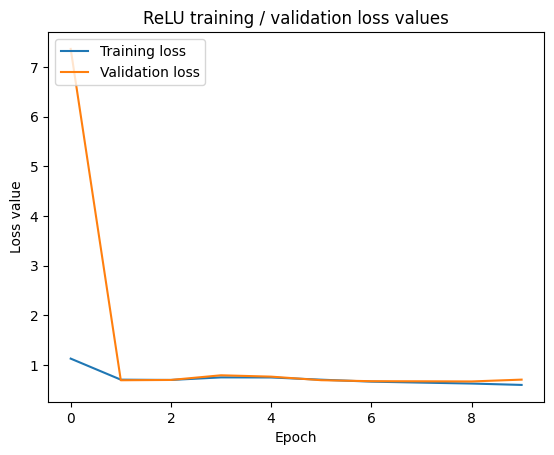

In [98]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# MobileNet

In [99]:
from tensorflow.keras.applications import MobileNet
mode = MobileNet(input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet')


for layer in mode.layers[:-5]:
    layer.trainable = False

model = tf.keras.Sequential([mode,
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(2, activation='softmax')
])





model.compile(loss='categorical_crossentropy', 
              optimizer=Nadam(learning_rate=0.0001), 
              metrics=['accuracy', auc, f1_score, kappa])

# train model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10 , batch_size = 75)


17225924/17225924 [==============================] - 0s 0us/step
Epoch 1/10
19/19 [==============================] - 8s 162ms/step - loss: 3.8308 - accuracy: 0.5723 - auc_3: 0.5866 - f1_score: 0.5589 - cohen_kappa: -0.9704 - val_loss: 3.1767 - val_accuracy: 0.6000 - val_auc_3: 0.6294 - val_f1_score: 0.5833 - val_cohen_kappa: -0.9231
Epoch 2/10
19/19 [==============================] - 1s 77ms/step - loss: 2.7514 - accuracy: 0.8916 - auc_3: 0.9570 - f1_score: 0.8903 - cohen_kappa: -0.9774 - val_loss: 3.1950 - val_accuracy: 0.5882 - val_auc_3: 0.6499 - val_f1_score: 0.5202 - val_cohen_kappa: -0.7517
Epoch 3/10
19/19 [==============================] - 1s 77ms/step - loss: 2.4561 - accuracy: 0.9808 - auc_3: 0.9961 - f1_score: 0.9806 - cohen_kappa: -0.9783 - val_loss: 3.2428 - val_accuracy: 0.6000 - val_auc_3: 0.6447 - val_f1_score: 0.5290 - val_cohen_kappa: -0.7380
Epoch 4/10
19/19 [==============================] - 1s 78ms/step - loss: 2.3487 - accuracy: 0.9867 - auc_3: 0.9966 - f1_score: 

In [100]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 1s 59ms/step - loss: 2.7728 - accuracy: 0.6000 - auc_3: 0.6516 - f1_score: 0.5995 - cohen_kappa: -0.9975


[2.772815227508545,
 0.6000000238418579,
 0.6515570878982544,
 array([0.6136364 , 0.58536583], dtype=float32),
 -0.997511625289917]

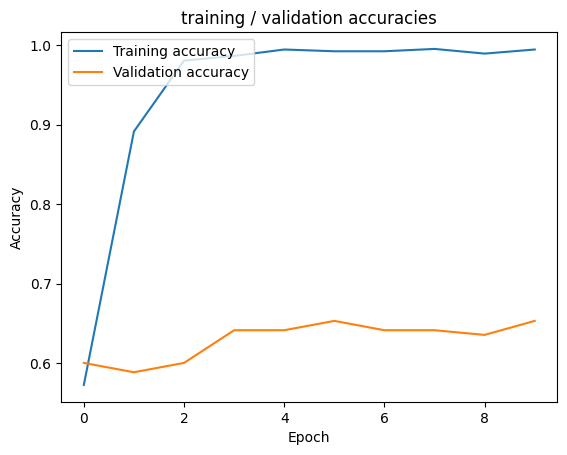

In [101]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

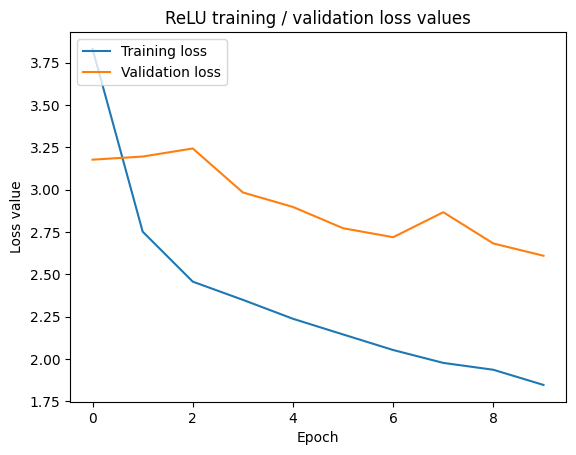

In [102]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# InceptionResNetV2

In [103]:
from tensorflow.keras.applications import InceptionResNetV2
mode = InceptionResNetV2(input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet')


for layer in mode.layers[:-5]:
    layer.trainable = False

model = tf.keras.Sequential([mode,
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(2, activation='softmax')
])





model.compile(loss='categorical_crossentropy', 
              optimizer=Nadam(learning_rate=0.0001), 
              metrics=['accuracy', auc, f1_score, kappa])

# train model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10 , batch_size = 75)


219055592/219055592 [==============================] - 1s 0us/step
Epoch 1/10
19/19 [==============================] - 25s 529ms/step - loss: 3.3818 - accuracy: 0.5656 - auc_3: 0.5866 - f1_score: 0.5625 - cohen_kappa: -0.9685 - val_loss: 3.1741 - val_accuracy: 0.5471 - val_auc_3: 0.6016 - val_f1_score: 0.5400 - val_cohen_kappa: -0.9699
Epoch 2/10
19/19 [==============================] - 5s 243ms/step - loss: 2.8847 - accuracy: 0.7994 - auc_3: 0.8785 - f1_score: 0.7952 - cohen_kappa: -0.9599 - val_loss: 3.8003 - val_accuracy: 0.5294 - val_auc_3: 0.5730 - val_f1_score: 0.4194 - val_cohen_kappa: -0.6814
Epoch 3/10
19/19 [==============================] - 5s 244ms/step - loss: 2.6171 - accuracy: 0.8761 - auc_3: 0.9492 - f1_score: 0.8742 - cohen_kappa: -0.9698 - val_loss: 3.0800 - val_accuracy: 0.5941 - val_auc_3: 0.6110 - val_f1_score: 0.5938 - val_cohen_kappa: -0.9983
Epoch 4/10
19/19 [==============================] - 5s 243ms/step - loss: 2.3711 - accuracy: 0.9484 - auc_3: 0.9897 - f1_s

In [104]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 2s 182ms/step - loss: 2.4573 - accuracy: 0.6412 - auc_3: 0.6996 - f1_score: 0.6332 - cohen_kappa: -0.9577


[2.4572930335998535,
 0.6411764621734619,
 0.6996366381645203,
 array([0.57931036, 0.6871795 ], dtype=float32),
 -0.9576631784439087]

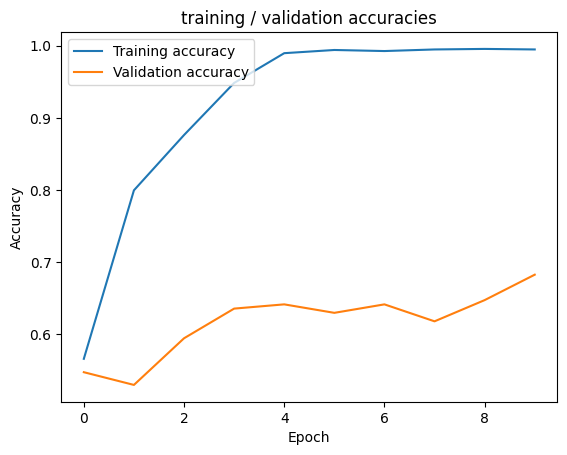

In [105]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

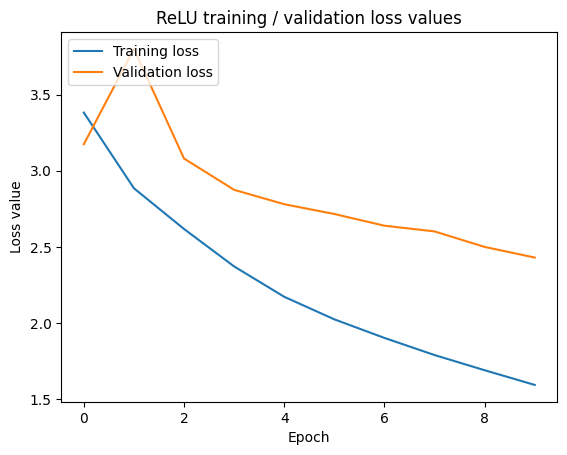

In [106]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# ResNet101

In [107]:
from tensorflow.keras.applications import ResNet101
mode = ResNet101(input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet')


for layer in mode.layers[:-5]:
    layer.trainable = False

model = tf.keras.Sequential([mode,
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(2, activation='softmax')
])





model.compile(loss='categorical_crossentropy', 
              optimizer=Nadam(learning_rate=0.0001), 
              metrics=['accuracy', auc, f1_score, kappa])

# train model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10 , batch_size = 75)


171446536/171446536 [==============================] - 1s 0us/step
Epoch 1/10
19/19 [==============================] - 16s 377ms/step - loss: 3.0663 - accuracy: 0.5280 - auc_3: 0.5462 - f1_score: 0.5328 - cohen_kappa: -0.9672 - val_loss: 2.2033 - val_accuracy: 0.5176 - val_auc_3: 0.5657 - val_f1_score: 0.3411 - val_cohen_kappa: -0.5773
Epoch 2/10
19/19 [==============================] - 4s 231ms/step - loss: 1.8458 - accuracy: 0.5524 - auc_3: 0.5672 - f1_score: 0.5415 - cohen_kappa: -0.9536 - val_loss: 1.5633 - val_accuracy: 0.4824 - val_auc_3: 0.5445 - val_f1_score: 0.3254 - val_cohen_kappa: -0.6225
Epoch 3/10
19/19 [==============================] - 4s 232ms/step - loss: 1.2549 - accuracy: 0.5944 - auc_3: 0.6136 - f1_score: 0.5750 - cohen_kappa: -0.9125 - val_loss: 1.0952 - val_accuracy: 0.4824 - val_auc_3: 0.5482 - val_f1_score: 0.3254 - val_cohen_kappa: -0.6225
Epoch 4/10
19/19 [==============================] - 4s 233ms/step - loss: 0.9799 - accuracy: 0.6187 - auc_3: 0.6484 - f1_s

In [108]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 1s 87ms/step - loss: 1.0722 - accuracy: 0.5471 - auc_3: 0.6122 - f1_score: 0.3536 - cohen_kappa: -0.5393


[1.0721514225006104,
 0.5470588207244873,
 0.6122145652770996,
 array([0.       , 0.7072243], dtype=float32),
 -0.539322018623352]

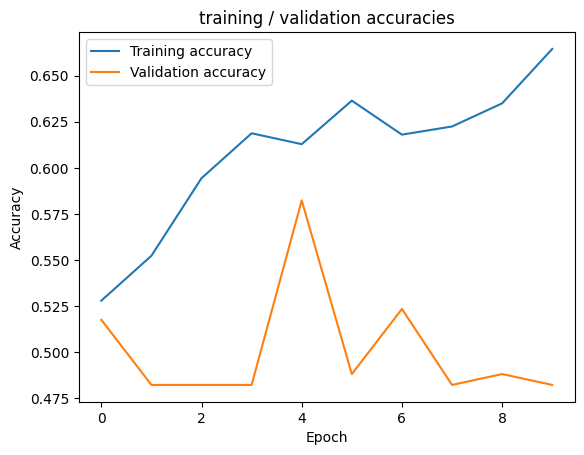

In [109]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

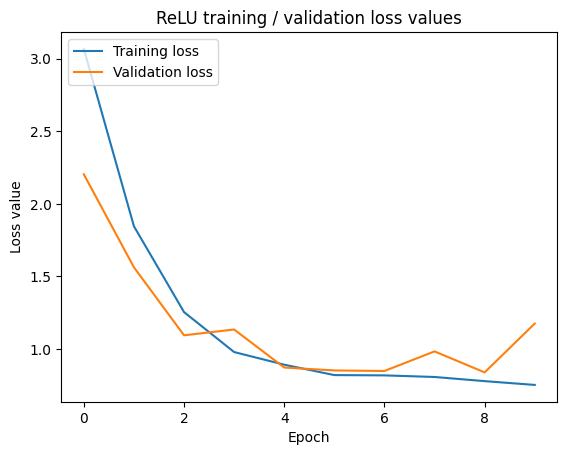

In [110]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Conv2d 4 Layer

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM

model = Sequential([
    Conv2D(64, kernel_size=(3,3), input_shape=(224, 224, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy', auc, f1_score, kappa])
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10 , batch_size = 75)

Epoch 1/10
19/19 [==============================] - 6s 178ms/step - loss: 1.1067 - accuracy: 0.5074 - auc_3: 0.5256 - f1_score: 0.4889 - cohen_kappa: -0.9142 - val_loss: 2.7363 - val_accuracy: 0.5000 - val_auc_3: 0.4861 - val_f1_score: 0.4261 - val_cohen_kappa: -0.7719
Epoch 2/10
19/19 [==============================] - 2s 129ms/step - loss: 0.6981 - accuracy: 0.5420 - auc_3: 0.5499 - f1_score: 0.5045 - cohen_kappa: -0.8593 - val_loss: 0.6941 - val_accuracy: 0.5235 - val_auc_3: 0.5640 - val_f1_score: 0.4158 - val_cohen_kappa: -0.6886
Epoch 3/10
19/19 [==============================] - 2s 127ms/step - loss: 0.6872 - accuracy: 0.5619 - auc_3: 0.5759 - f1_score: 0.5183 - cohen_kappa: -0.8340 - val_loss: 0.9855 - val_accuracy: 0.5000 - val_auc_3: 0.4979 - val_f1_score: 0.4623 - val_cohen_kappa: -0.8690
Epoch 4/10
19/19 [==============================] - 2s 127ms/step - loss: 0.7140 - accuracy: 0.5767 - auc_3: 0.5839 - f1_score: 0.5704 - cohen_kappa: -0.9712 - val_loss: 0.6937 - val_accurac

In [112]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 29ms/step - loss: 1.0102 - accuracy: 0.5353 - auc_3: 0.5847 - f1_score: 0.5351 - cohen_kappa: -0.9994


[1.0102057456970215,
 0.5352941155433655,
 0.5846886038780212,
 array([0.5433526 , 0.52694607], dtype=float32),
 -0.9993774890899658]

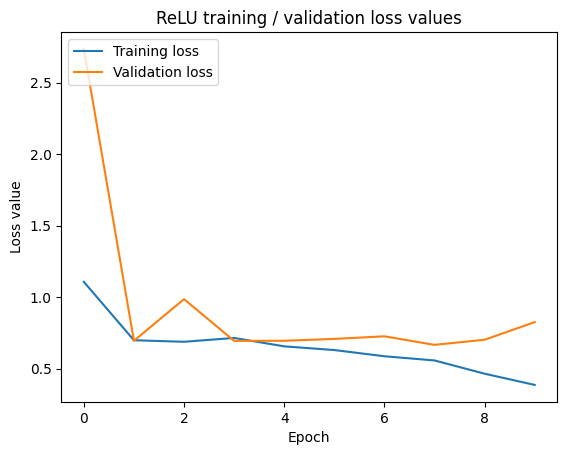

In [113]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Conv2D 5 Layer

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM

model = Sequential([
    Conv2D(64, kernel_size=(3,3), input_shape=(224, 224, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy', auc, f1_score, kappa])
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10 , batch_size = 75)

Epoch 1/10
19/19 [==============================] - 6s 181ms/step - loss: 0.8043 - accuracy: 0.5022 - auc_3: 0.5258 - f1_score: 0.5047 - cohen_kappa: -0.9953 - val_loss: 0.7957 - val_accuracy: 0.4941 - val_auc_3: 0.4258 - val_f1_score: 0.3978 - val_cohen_kappa: -0.7241
Epoch 2/10
19/19 [==============================] - 2s 130ms/step - loss: 0.8858 - accuracy: 0.5509 - auc_3: 0.5524 - f1_score: 0.3779 - cohen_kappa: -0.5649 - val_loss: 2.6574 - val_accuracy: 0.5294 - val_auc_3: 0.5340 - val_f1_score: 0.5073 - val_cohen_kappa: -0.9142
Epoch 3/10
19/19 [==============================] - 2s 129ms/step - loss: 0.6896 - accuracy: 0.5516 - auc_3: 0.5550 - f1_score: 0.5184 - cohen_kappa: -0.8710 - val_loss: 0.6835 - val_accuracy: 0.5353 - val_auc_3: 0.5753 - val_f1_score: 0.5122 - val_cohen_kappa: -0.9095
Epoch 4/10
19/19 [==============================] - 2s 129ms/step - loss: 0.6868 - accuracy: 0.5509 - auc_3: 0.5675 - f1_score: 0.5111 - cohen_kappa: -0.8494 - val_loss: 0.6839 - val_accurac

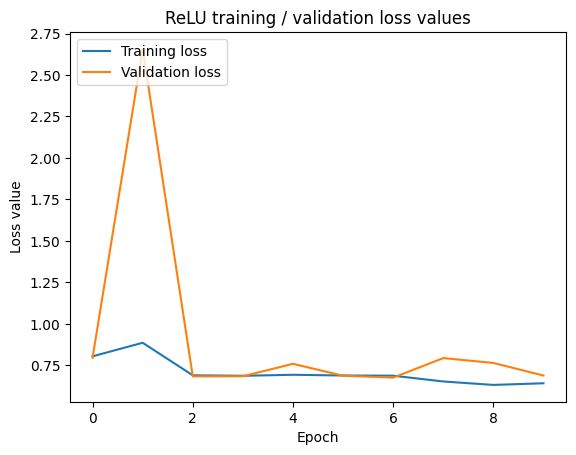

In [115]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Conv 6 Layer

In [116]:
model = Sequential([
    Conv2D(64, kernel_size=(3,3), input_shape=(224, 224, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy', auc, f1_score, kappa])
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10 , batch_size = 75)

Epoch 1/10
19/19 [==============================] - 7s 184ms/step - loss: 0.7244 - accuracy: 0.5420 - auc_3: 0.5444 - f1_score: 0.4571 - cohen_kappa: -0.7190 - val_loss: 0.6919 - val_accuracy: 0.5176 - val_auc_3: 0.5348 - val_f1_score: 0.3411 - val_cohen_kappa: -0.5773
Epoch 2/10
19/19 [==============================] - 3s 132ms/step - loss: 0.6961 - accuracy: 0.5280 - auc_3: 0.5225 - f1_score: 0.4150 - cohen_kappa: -0.6762 - val_loss: 0.7119 - val_accuracy: 0.5176 - val_auc_3: 0.5139 - val_f1_score: 0.3411 - val_cohen_kappa: -0.5773
Epoch 3/10
19/19 [==============================] - 2s 131ms/step - loss: 0.7251 - accuracy: 0.5465 - auc_3: 0.5507 - f1_score: 0.4062 - cohen_kappa: -0.6179 - val_loss: 0.7243 - val_accuracy: 0.5529 - val_auc_3: 0.5874 - val_f1_score: 0.5028 - val_cohen_kappa: -0.8167
Epoch 4/10
19/19 [==============================] - 2s 132ms/step - loss: 0.7720 - accuracy: 0.5147 - auc_3: 0.5158 - f1_score: 0.4935 - cohen_kappa: -0.9193 - val_loss: 1.0292 - val_accurac

In [117]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 34ms/step - loss: 0.7130 - accuracy: 0.4294 - auc_3: 0.4392 - f1_score: 0.3386 - cohen_kappa: -0.7585


[0.7130316495895386,
 0.42941176891326904,
 0.43915224075317383,
 array([0.583691  , 0.09345794], dtype=float32),
 -0.7584958076477051]

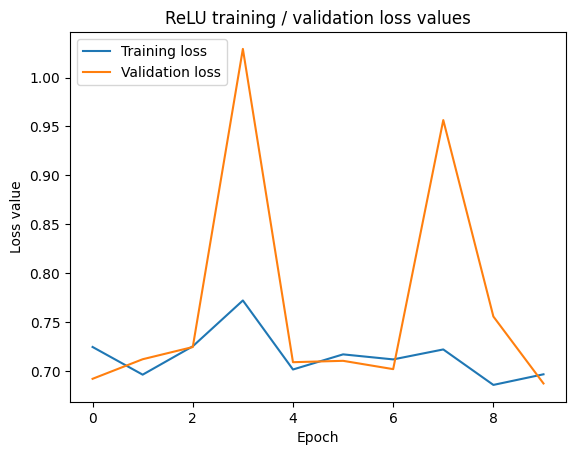

In [118]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# Conv2D 7 layer

In [119]:
model = Sequential([
    Conv2D(64, kernel_size=(3,3), input_shape=(224, 224, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy', auc, f1_score, kappa])
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10 , batch_size = 75)

Epoch 1/10
19/19 [==============================] - 7s 179ms/step - loss: 0.7194 - accuracy: 0.5280 - auc_3: 0.5193 - f1_score: 0.4891 - cohen_kappa: -0.8962 - val_loss: 0.7781 - val_accuracy: 0.4941 - val_auc_3: 0.4328 - val_f1_score: 0.3978 - val_cohen_kappa: -0.7241
Epoch 2/10
19/19 [==============================] - 2s 132ms/step - loss: 1.0100 - accuracy: 0.5501 - auc_3: 0.5437 - f1_score: 0.3594 - cohen_kappa: -0.5411 - val_loss: 5.1961 - val_accuracy: 0.4941 - val_auc_3: 0.4949 - val_f1_score: 0.3978 - val_cohen_kappa: -0.7241
Epoch 3/10
19/19 [==============================] - 2s 132ms/step - loss: 0.6907 - accuracy: 0.5472 - auc_3: 0.5513 - f1_score: 0.3552 - cohen_kappa: -0.5411 - val_loss: 0.7090 - val_accuracy: 0.5176 - val_auc_3: 0.5540 - val_f1_score: 0.3411 - val_cohen_kappa: -0.5773
Epoch 4/10
19/19 [==============================] - 2s 131ms/step - loss: 0.7157 - accuracy: 0.5509 - auc_3: 0.5492 - f1_score: 0.3552 - cohen_kappa: -0.5344 - val_loss: 1.0896 - val_accurac

In [120]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 23ms/step - loss: 0.7176 - accuracy: 0.4471 - auc_3: 0.4888 - f1_score: 0.3417 - cohen_kappa: -0.7241


[0.7176453471183777,
 0.4470588266849518,
 0.4887889325618744,
 array([0.60504204, 0.07843137], dtype=float32),
 -0.7241377830505371]

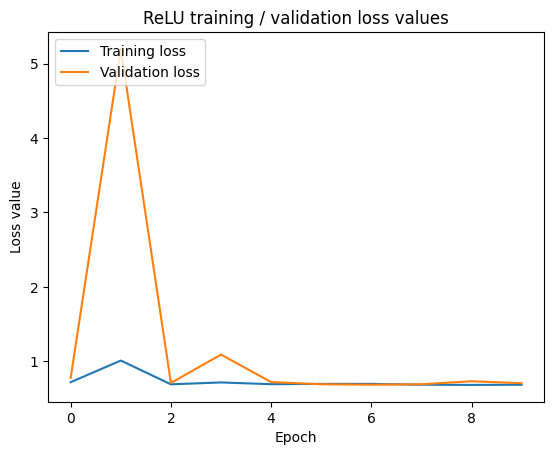

In [121]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# conv2d 8 layer

In [122]:
model = Sequential([
    Conv2D(64, kernel_size=(3,3), input_shape=(224, 224, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy', auc, f1_score, kappa])
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10 , batch_size = 75)

Epoch 1/10
19/19 [==============================] - 7s 178ms/step - loss: 0.7177 - accuracy: 0.5251 - auc_3: 0.5359 - f1_score: 0.5015 - cohen_kappa: -0.9419 - val_loss: 0.7086 - val_accuracy: 0.4941 - val_auc_3: 0.4374 - val_f1_score: 0.3978 - val_cohen_kappa: -0.7241
Epoch 2/10
19/19 [==============================] - 3s 133ms/step - loss: 0.8181 - accuracy: 0.5103 - auc_3: 0.5160 - f1_score: 0.5053 - cohen_kappa: -0.9801 - val_loss: 1.2590 - val_accuracy: 0.4941 - val_auc_3: 0.4263 - val_f1_score: 0.3978 - val_cohen_kappa: -0.7241
Epoch 3/10
19/19 [==============================] - 3s 132ms/step - loss: 0.6961 - accuracy: 0.5317 - auc_3: 0.5452 - f1_score: 0.3991 - cohen_kappa: -0.6384 - val_loss: 0.7249 - val_accuracy: 0.5412 - val_auc_3: 0.5513 - val_f1_score: 0.4897 - val_cohen_kappa: -0.8167
Epoch 4/10
19/19 [==============================] - 2s 131ms/step - loss: 0.7210 - accuracy: 0.5354 - auc_3: 0.5485 - f1_score: 0.4861 - cohen_kappa: -0.8249 - val_loss: 1.0048 - val_accurac

In [123]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 23ms/step - loss: 0.6878 - accuracy: 0.5235 - auc_3: 0.5649 - f1_score: 0.4229 - cohen_kappa: -0.7030


[0.6877623796463013,
 0.5235294103622437,
 0.5648788809776306,
 array([0.18181817, 0.6639004 ], dtype=float32),
 -0.7029551267623901]

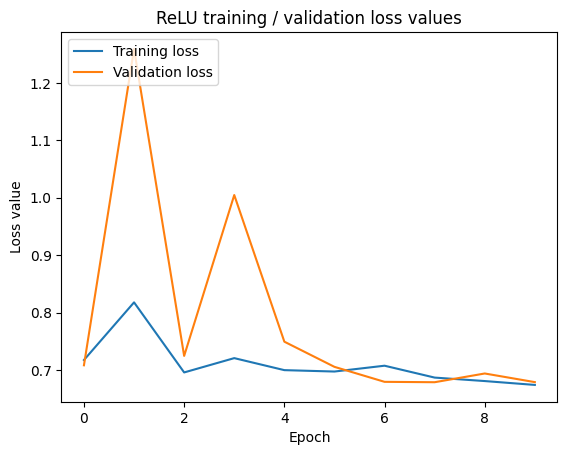

In [124]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# DenseNet121

In [125]:
from tensorflow.keras.applications import DenseNet121
mode = DenseNet121(input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet')


for layer in mode.layers[:-5]:
    layer.trainable = False

model = tf.keras.Sequential([mode,
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(2, activation='softmax')
])





model.compile(loss='categorical_crossentropy', 
              optimizer=Nadam(learning_rate=0.0001), 
              metrics=['accuracy', auc, f1_score, kappa])

# train model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10 , batch_size = 75)

29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/10
19/19 [==============================] - 20s 419ms/step - loss: 3.5888 - accuracy: 0.5605 - auc_3: 0.5803 - f1_score: 0.5538 - cohen_kappa: -0.9887 - val_loss: 2.8432 - val_accuracy: 0.6235 - val_auc_3: 0.6628 - val_f1_score: 0.6182 - val_cohen_kappa: -0.9727
Epoch 2/10
19/19 [==============================] - 3s 140ms/step - loss: 2.5222 - accuracy: 0.7441 - auc_3: 0.8329 - f1_score: 0.7378 - cohen_kappa: -0.9527 - val_loss: 2.5040 - val_accuracy: 0.6176 - val_auc_3: 0.6809 - val_f1_score: 0.6175 - val_cohen_kappa: -0.9994
Epoch 3/10
19/19 [==============================] - 3s 140ms/step - loss: 2.0615 - accuracy: 0.8481 - auc_3: 0.9269 - f1_score: 0.8459 - cohen_kappa: -0.9725 - val_loss: 2.3882 - val_accuracy: 0.6000 - val_auc_3: 0.6430 - val_f1_score: 0.5713 - val_cohen_kappa: -0.8744
Epoch 4/10
19/19 [==============================] - 3s 140ms/step - loss: 1.7670 - accuracy: 0.8894 - auc_3: 0.9643 - f1_sco

In [126]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 3s 276ms/step - loss: 1.8002 - accuracy: 0.7059 - auc_3: 0.7447 - f1_score: 0.6988 - cohen_kappa: -0.9543


[1.8001644611358643,
 0.7058823704719543,
 0.7447231411933899,
 array([0.65277773, 0.744898  ], dtype=float32),
 -0.9542872905731201]

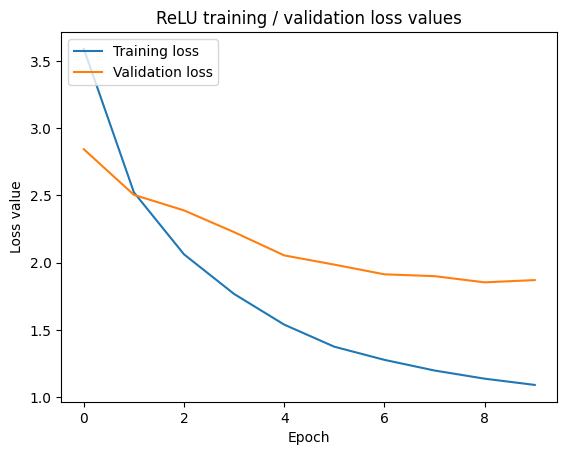

In [127]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

# DenseNet169

In [128]:
from tensorflow.keras.applications import DenseNet169
mode = DenseNet169(input_shape=(image_size, image_size, 3), include_top=False, weights='imagenet')


for layer in mode.layers[:-5]:
    layer.trainable = False

model = tf.keras.Sequential([mode,
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(2, activation='softmax')
])





model.compile(loss='categorical_crossentropy', 
              optimizer=Nadam(learning_rate=0.0001), 
              metrics=['accuracy', auc, f1_score, kappa])

# train model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10 , batch_size = 75)

51877672/51877672 [==============================] - 0s 0us/step
Epoch 1/10
19/19 [==============================] - 20s 471ms/step - loss: 3.3022 - accuracy: 0.5959 - auc_3: 0.6212 - f1_score: 0.6026 - cohen_kappa: -0.9726 - val_loss: 2.6175 - val_accuracy: 0.6235 - val_auc_3: 0.6946 - val_f1_score: 0.5991 - val_cohen_kappa: -0.8849
Epoch 2/10
19/19 [==============================] - 3s 168ms/step - loss: 2.2602 - accuracy: 0.7581 - auc_3: 0.8382 - f1_score: 0.7540 - cohen_kappa: -0.9669 - val_loss: 2.1047 - val_accuracy: 0.6529 - val_auc_3: 0.7526 - val_f1_score: 0.6494 - val_cohen_kappa: -0.9802
Epoch 3/10
19/19 [==============================] - 3s 172ms/step - loss: 1.7505 - accuracy: 0.8400 - auc_3: 0.9243 - f1_score: 0.8382 - cohen_kappa: -0.9786 - val_loss: 2.1113 - val_accuracy: 0.5588 - val_auc_3: 0.6400 - val_f1_score: 0.4373 - val_cohen_kappa: -0.6448
Epoch 4/10
19/19 [==============================] - 3s 167ms/step - loss: 1.4488 - accuracy: 0.9041 - auc_3: 0.9660 - f1_sco

In [129]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 2s 181ms/step - loss: 1.5270 - accuracy: 0.7235 - auc_3: 0.7677 - f1_score: 0.7184 - cohen_kappa: -0.9640


[1.5270116329193115,
 0.7235293984413147,
 0.76766437292099,
 array([0.6802721 , 0.75647676], dtype=float32),
 -0.9640491008758545]

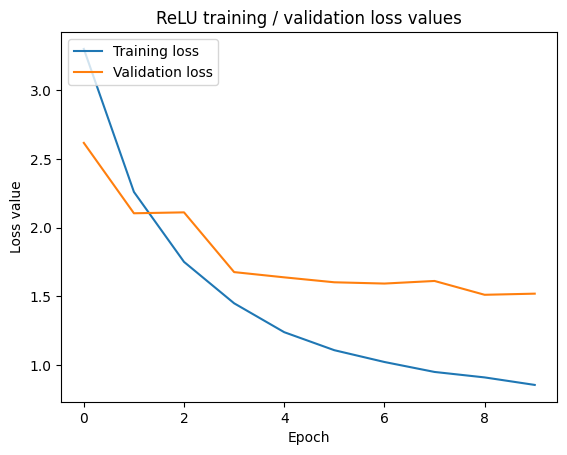

In [130]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()